# Movies recommedations 

## Recommender Systems 

The data was gathered from the popular:

[Grouplens Research: MovieLens](https://grouplens.org/datasets/movielens/)


In order to understand how this data is set-up please read the [README FILE](http://files.grouplens.org/datasets/movielens/ml-20m-README.html)

In [1]:

# importing our dependencies 

# data manipulation
import pandas as pd
import numpy as np

#graphics and visiluasations
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

/Users/Create/anaconda3/envs/DS/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## First glance at the data 

In [2]:
# opening the user item information 
user_item = pd.read_csv("u.item", sep='\t', encoding = "ISO-8859-1")
user_item.head()

,1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
0,2|GoldenEye (1995)|01-Jan-1995||http://us.imdb...
1,3|Four Rooms (1995)|01-Jan-1995||http://us.imd...
2,4|Get Shorty (1995)|01-Jan-1995||http://us.imd...
3,5|Copycat (1995)|01-Jan-1995||http://us.imdb.c...
4,6|Shanghai Triad (Yao a yao yao dao waipo qiao...


In [3]:
# opening the movie and id's titles 
movie_titles = pd.read_csv("Movie_Id_Titles") # sep='\t')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
# opening the user data table
user_data = pd.read_csv("u.data", sep='\t')
user_data.head()

,0,50,5,881250949
0,0,172,5,881250949
1,0,133,1,881250949
2,196,242,3,881250949
3,186,302,3,891717742
4,22,377,1,878887116


## Putting it in a dataframe 

In [5]:

# giving the u.data some names for our columns 
columns_names = ['user_id', 'item_id', 'rating', 'timestamp']


In [6]:
# opening the u.data but with columns names
user_data_info = pd.read_csv('u.data', sep='\t', names=columns_names)
user_data_info.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


Essentially the user_id describes the user with its corresponding user id, the items id which in this case is a movie, the rating givig to the movie byt its user and the timestamp which at what time they gave that particular movie that rating.

## Merging the user data information table and the movie titles tables

In [7]:
# merging the two tables by using pandas.merge command
# merging the two tables by item_id and grab the title

info = pd.merge(user_data_info, movie_titles, on='item_id')   
info.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [8]:
# let's get a descriptive statistics 

info.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [9]:
# grouping by title and rating only and putting it in a table

title_rating = pd.DataFrame(info.groupby('title')['rating'].mean())
title_rating.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [10]:

# gathering title and rating in a table
# too see the movies with the most ratings 

title_rating = pd.DataFrame(info.groupby('title')['rating'].mean().sort_values(ascending=False))
title_rating.head()

,rating
title,
Marlene Dietrich: Shadow and Light (1996),5.0
Prefontaine (1997),5.0
Santa with Muscles (1996),5.0
Star Kid (1997),5.0
Someone Else's America (1995),5.0


In [11]:

# putting the number of ratings and avg rating 
# adding a new column named number of ratings
# the index is title

most_ratings = pd.DataFrame(info.groupby('title')['rating'].count().sort_values(ascending=False))
most_ratings.head()


,rating
title,
Star Wars (1977),584
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485


In [12]:

# grouping by title and rating and getting the mean

Ratings = pd.DataFrame(info.groupby('title')['rating'].mean())
Ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [13]:
# grouping by title and rating and getting the total count 

Ratings['number of ratings']= pd.DataFrame(info.groupby('title')['rating'].count())
Ratings.head()

,rating,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


## Creating plots 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e610668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10dae7d68>]], dtype=object)

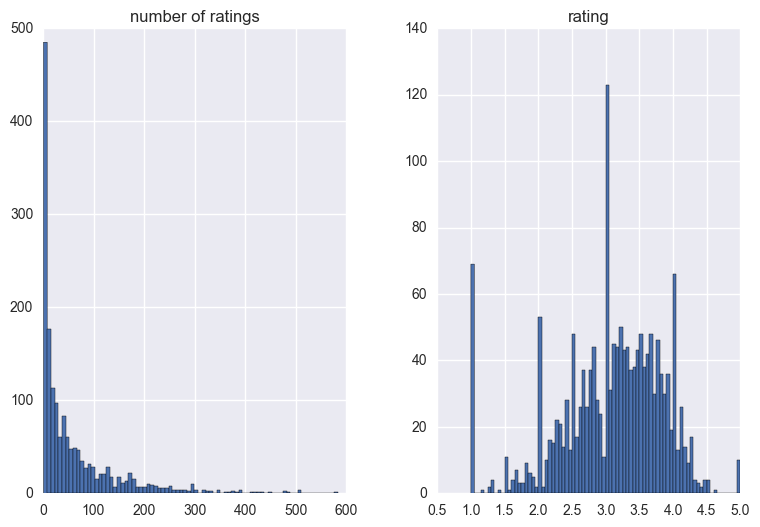

In [14]:

sns.set(style="darkgrid")

# putting both rating and number of ratings in a histogram
sns.set(rc={"figure.figsize": (9, 6)})

hist = Ratings.hist(bins = 80)
hist

In the number of ratings histogram, most of the number of ratings are around the 0 line.
Also, most movies ratings are distributed normally around 3 and 3.5 stars.

## Distribuition of avg rating and the number of ratings

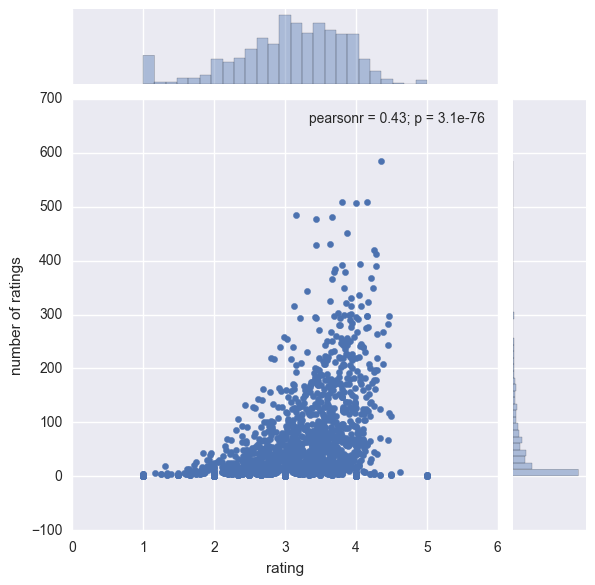

In [15]:
dist = sns.jointplot(x ='rating', y='number of ratings', data= Ratings, alpha = 1)
dist

The trend, as you get more number of ratings you will get a higher number of a movie rating.  The popular movies are watched the most and the more viewers watching it the more reviews you are going to have.






## Creating the recommendation system of items (movies) similarities

In [16]:
info.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [17]:
# grab the user_id, rating and title since is the only thing we are concern about

movie_info = info.pivot_table(index='user_id', columns='title', values='rating')
movie_info.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is a lot of missing values because most of the people have not watched most of the movies.

------
Therefore, we will only choose a few movies. (top five)

In [18]:
ratings = Ratings.sort_values('number of ratings', ascending=False)
ratings.head()


,rating,number of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


Let's choose Contact(1997) and Return of the jedi(1983)

In [19]:
# choosing contact as our first movie

Contact_user_ratings = movie_info['Contact (1997)']
Contact_user_ratings.head()

user_id
0    NaN
1    5.0
2    3.0
3    2.0
4    5.0
Name: Contact (1997), dtype: float64

In [20]:
# Using the corrwith function 
# corrwith will conduct the pairwise correlation between rows or columns of two dataframe objects.

Similar_to_Contact = movie_info.corrwith(Contact_user_ratings)
Similar_to_Contact.head()

/Users/Create/anaconda3/envs/DS/lib/python3.5/site-packages/numpy/lib/function_base.py:2487: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/Users/Create/anaconda3/envs/DS/lib/python3.5/site-packages/numpy/lib/function_base.py:2496: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


title
'Til There Was You (1997)    0.904534
1-900 (1994)                      NaN
101 Dalmatians (1996)       -0.108441
12 Angry Men (1957)          0.022265
187 (1997)                   0.135512
dtype: float64

In [21]:
#  choosing return of the jedi as our second movie 

Jedi_user_ratings = movie_info['Return of the Jedi (1983)']
Jedi_user_ratings.head()

user_id
0    NaN
1    5.0
2    NaN
3    4.0
4    NaN
Name: Return of the Jedi (1983), dtype: float64

In [22]:
# Using the corrwith function 
# corrwith will conduct the pairwise correlation between rows or columns of two dataframe objects.


Similar_to_Jedi = movie_info.corrwith(Jedi_user_ratings)
Similar_to_Jedi.head()

/Users/Create/anaconda3/envs/DS/lib/python3.5/site-packages/numpy/lib/function_base.py:2487: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/Users/Create/anaconda3/envs/DS/lib/python3.5/site-packages/numpy/lib/function_base.py:2496: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


title
'Til There Was You (1997)    1.000000
1-900 (1994)                -0.828079
101 Dalmatians (1996)        0.165659
12 Angry Men (1957)         -0.026169
187 (1997)                   0.064155
dtype: float64

## let's put both movies correlations on a table

In [23]:
corr_contact = pd.DataFrame(Similar_to_Contact, columns = ['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()

,Correlation
title,
'Til There Was You (1997),0.904534
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512
2 Days in the Valley (1996),0.248031


Above in the table we can see the movies user rating that are correlated with the user ratins of the Contact movie.  Some values do not make sense.

In [24]:
corr_contact.sort_values('Correlation', ascending=False).head()

,Correlation
title,
Lamerica (1994),1.0
Faust (1994),1.0
"Wedding Gift, The (1994)",1.0
"Visitors, The (Visiteurs, Les) (1993)",1.0
King of the Hill (1993),1.0


Here we get a model that is perfect correlated with Contact. This is due because this movies have been seen by only one other person who also happen to have rate Contact with 5 stars.

--------

Therefore, we can filter out movies that have less than a certain number of reviews and then we can put the remaining in our model.

-----

We can go back to our histogram (in the number of ratings) and play around with the number of movies that have less than 100 reviews.

In [25]:

# let's join ratings and number of ratings with the correlation


corr_contact = corr_contact.join(Ratings['number of ratings'])


In [26]:

# # table with both correlatins and the number of ratings with the title of its index

corr_contact.head()

,Correlation,number of ratings
title,,
'Til There Was You (1997),0.904534,9
101 Dalmatians (1996),-0.108441,109
12 Angry Men (1957),0.022265,125
187 (1997),0.135512,41
2 Days in the Valley (1996),0.248031,93


In [27]:
# sorting values by Correlation and number of ratings > 100

num_of_ratings = corr_contact[corr_contact['number of ratings']>100].sort_values('Correlation', ascending=False)
num_of_ratings.head()


,Correlation,number of ratings
title,,
Contact (1997),1.000000,509
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136


Now, we can see movies that make more sense to be correlated with Contact.
The viewers might like Philadelphia but may or may not like Young Guns or Sling Blade (which have a lower correlation than the movie Philadelphia).

-------


Also, Young Guns might be showing up here because is most likely a popular movie and it was rated about 101 times.


Now, let's explore **Return of the Jedi**.

In [28]:
# Putting in a table movies similar to the Return of the Jedi

corr_jedi = pd.DataFrame(Similar_to_Jedi, columns = ['Correlation'])
corr_jedi.dropna(inplace=True)
corr_jedi.head()

,Correlation
title,
'Til There Was You (1997),1.000000
1-900 (1994),-0.828079
101 Dalmatians (1996),0.165659
12 Angry Men (1957),-0.026169
187 (1997),0.064155


In [29]:
# joining the correlatins with the number of ratings 

corr_jedi = corr_jedi.join(Ratings['number of ratings'])

In [30]:
corr_jedi.head()

,Correlation,number of ratings
title,,
'Til There Was You (1997),1.000000,9
1-900 (1994),-0.828079,5
101 Dalmatians (1996),0.165659,109
12 Angry Men (1957),-0.026169,125
187 (1997),0.064155,41


In [31]:
num_of_ratings = corr_jedi[corr_jedi['number of ratings']>100].sort_values('Correlation', ascending=False)
num_of_ratings.head()


,Correlation,number of ratings
title,,
Return of the Jedi (1983),1.000000,507
"Empire Strikes Back, The (1980)",0.721229,368
Star Wars (1977),0.672556,584
Raiders of the Lost Ark (1981),0.467391,420
Indiana Jones and the Last Crusade (1989),0.422294,331



Now, we can see the movies that are also highly correlated with the Return of the Jedi.
We see another star wars movie and it makes more sense that another star wars movies will be highly correlated with another star war movies. 

---

Therefore what we now can do is to play around with the filtering.
We can try to filter for > 50 number of ratings and see if we get better recommendations.



---



### End